# Phase 1 Code Challenge
This code challenge is designed to test your understanding of the Phase 1 material. It covers:

- Pandas
- Data Visualization
- Exploring Statistical Data
- Python Data Structures

*Read the instructions carefully.* Your code will need to meet detailed specifications to pass automated tests.

## Code Tests

We have provided some code tests for you to run to check that your work meets the item specifications. Passing these tests does not necessarily mean that you have gotten the item correct - there are additional hidden tests. However, if any of the tests do not pass, this tells you that your code is incorrect and needs changes to meet the specification. To determine what the issue is, read the comments in the code test cells, the error message you receive, and the item instructions.

---
## Part 1: Pandas [Suggested Time: 15 minutes]
---
In this part, you will preprocess a dataset from the video game [FIFA19](https://www.kaggle.com/karangadiya/fifa19), which contains data from the players' real-life careers.

In [1]:
# Run this cell

import pandas as pd
import numpy as np
from numbers import Number
import warnings
warnings.filterwarnings('ignore')

### 1.1) Read `fifa.csv` into a pandas DataFrame named `df`

Use pandas to create a new DataFrame, called `df`, containing the data from the dataset in the file `fifa.csv` in the folder containing this notebook. 

Hint: Use the string `'./fifa.csv'` as the file reference.

**Starter Code**

    df = 

In [2]:
# YOUR CODE HERE
df = pd.read_csv("fifa.csv")

In [3]:
# This test confirms that you have created a DataFrame named df

assert type(df) == pd.DataFrame


### 1.2) Convert the `'Release Clause'` values from Euros to dollars

The `'Release Clause'` variable contains prices denominated in Euros. Use the exchange rate `1 Euro = 1.2 Dollars` to convert the prices to dollars. 

In [4]:
# Exchange rate
exchange_rate = 1.2

# Convert 'Release Clause' values to dollars
df['Release Clause (USD)'] = df['Release Clause'] * exchange_rate

# Now, 'Release Clause (USD)' contains the values in dollars


### 1.3) Drop rows from `df` with missing values for the `'Release Clause'` feature.
    
Make sure that `df` remains the name of the dataset with the dropped rows.

In [5]:
# Drop rows with missing values in the 'Release Clause' column
df = df.dropna(subset=['Release Clause'])

# Now, df contains the dataset with rows having missing values in 'Release Clause' dropped


In [6]:
# This test confirms that your dataset has the correct number of observations after dropping

assert df['Release Clause'].shape[0] == 16643


### 1.4) Create a list `top_10_countries` containing the names of the 10 countries with the most players (using the `'Nationality'` column).

Hint: Your answer should include England, Germany, Spain, France, and Argentina

**Starter Code**

    top_10_countries = 

In [7]:
# YOUR CODE HERE
# Assuming df is the DataFrame containing the FIFA dataset

# Get the top 10 countries with the most players
top_10_countries = df['Nationality'].value_counts().head(10).index.tolist()

top_10_countries
# Now, top_10_countries contains the names of the top 10 countries with the most players


['England',
 'Germany',
 'Spain',
 'France',
 'Argentina',
 'Brazil',
 'Italy',
 'Colombia',
 'Japan',
 'Netherlands']

In [8]:
# This test confirms that you have created a list named top_10_countries

assert type(top_10_countries) == list

# This test confirms that top_10_countries contains England, Germany, Spain, France, and Argentina

assert set(['England', 'Germany', 'Spain', 'France', 'Argentina']).issubset(set(top_10_countries))


## Part 2: Data Visualization [Suggested Time: 20 minutes]
This part uses the same FIFA dataset, and asks you to plot data using `matplotlib`.

In [9]:
# Run this cell

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

### 2.1) Create a matplotlib figure `player_count_figure` containing a labeled bar chart with the number of players from England, Germany, Spain, France, and Argentina

Use the strings provided below (`bar_chart_title`, `bar_chart_count_label`, and `bar_chart_series_label`) to title and label your bar chart. 

Hint: These are the countries with the top 5 numbers of players, so you may be able to adapt some of the code you used for question 1.4. If you were unable to complete 1.4, use the following values:

```
Country Name  | Num Players
============  | ===========
England       | 1000
Germany       | 900
Spain         | 800
France        | 700
Argentina     | 600
```

**Starter Code**

    player_count_figure, ax = plt.subplots(figsize=(10, 6))

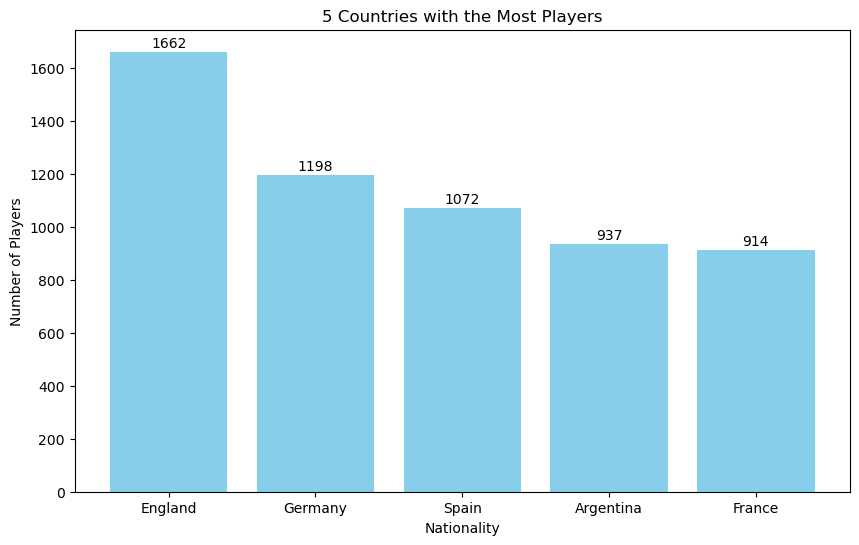

In [10]:
# Provided variables
bar_chart_countries = ['England', 'Germany', 'Spain', 'France', 'Argentina']
bar_chart_title = '5 Countries with the Most Players'
bar_chart_count_label = 'Number of Players'
bar_chart_series_label = 'Nationality'

# Read the FIFA dataset into a DataFrame
file_path = './fifa.csv'
df = pd.read_csv(file_path)

# Filter the DataFrame for the specified countries
filtered_df = df[df['Nationality'].isin(bar_chart_countries)]

# Count the number of players for each country
player_counts = filtered_df['Nationality'].value_counts()

# Create a bar chart and store it in the player_count_figure variable
player_count_figure = plt.figure(figsize=(10, 6))
plt.bar(player_counts.index, player_counts.values, color='skyblue')
plt.title(bar_chart_title)
plt.xlabel(bar_chart_series_label)
plt.ylabel(bar_chart_count_label)

# Show the count values on top of the bars
for i, value in enumerate(player_counts.values):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')

# Show the plot
plt.show()


In [11]:
# This test confirms that you have created a figure named player_count_figure

assert type(player_count_figure) == plt.Figure

# This test confirms that the figure contains exactly one axis

assert len(player_count_figure.axes) == 1


In [12]:
# These tests confirm that the figure has a title and axis labels 

assert player_count_figure.axes[0].get_title() != ''
assert player_count_figure.axes[0].get_ylabel() != ''
assert player_count_figure.axes[0].get_xlabel() != ''


### 2.2) Create a matplotlib figure `tackle_figure` containing a labeled scatter plot visualizing the relationship between `StandingTackle` (on X axis) and `SlidingTackle` (on Y axis)

Use the strings provided below (`scatter_plot_title`, `standing_tackle_label`, and `sliding_tackle_label`) to title and label your scatter plot. 

**Starter Code**

    tackle_figure, ax = plt.subplots(figsize=(10, 6))

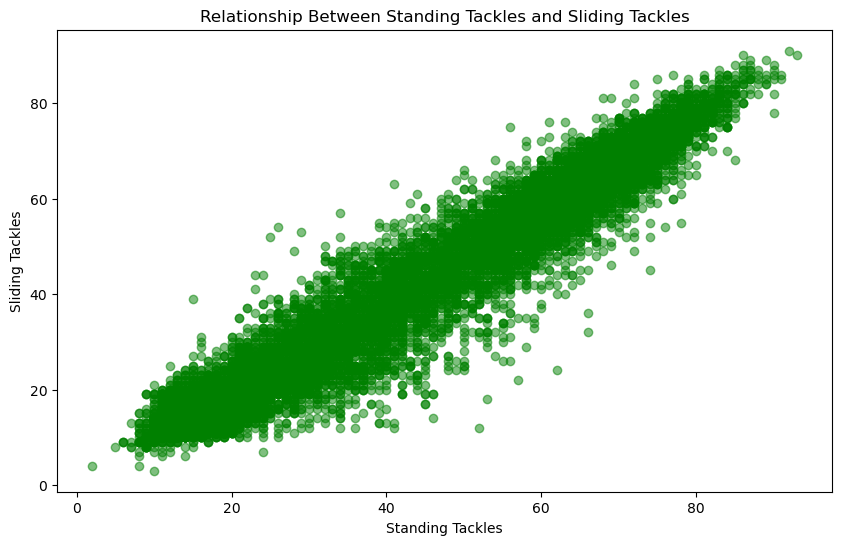

In [13]:
# Starter Code
tackle_figure, ax = plt.subplots(figsize=(10, 6))
scatter_plot_title = 'Relationship Between Standing Tackles and Sliding Tackles'
standing_tackle_label = 'Standing Tackles'
sliding_tackle_label = 'Sliding Tackles'

# Read the FIFA dataset into a DataFrame
file_path = './fifa.csv'
df = pd.read_csv(file_path)

# Scatter plot for the relationship between Standing Tackles and Sliding Tackles
ax.scatter(df['StandingTackle'], df['SlidingTackle'], alpha=0.5, color='green')
ax.set_title(scatter_plot_title)
ax.set_xlabel(standing_tackle_label)
ax.set_ylabel(sliding_tackle_label)

# Show the plot
plt.show()


In [14]:
# This test confirms that you have created a figure named tackle_figure

assert type(tackle_figure) == plt.Figure

# This test confirms that the figure contains exactly one axis

assert len(tackle_figure.axes) == 1


## Part 3: Exploring Statistical Data [Suggested Time: 20 minutes]
This part does some exploratory analysis using the same FIFA dataset.

### 3.1) Create numeric variables `mean_age` and `median_age` containing the mean and median player ages (respectively).

**Starter Code**

    mean_age = 
    median_age = 

In [15]:
# Read the FIFA dataset into a DataFrame
file_path = './fifa.csv'
df = pd.read_csv(file_path)

# Calculate mean and median player ages
mean_age = df['Age'].mean()
median_age = df['Age'].median()

# Print the results
print(f"Mean Age: {mean_age:.2f} years")
print(f"Median Age: {median_age:.2f} years")


Mean Age: 25.12 years
Median Age: 25.00 years


In [16]:
# These tests confirm that you have created numeric variables named mean_age and median_age

assert isinstance(mean_age, Number)
assert isinstance(median_age, Number)


### 3.2) Create numeric variables `oldest_argentine_name` and `oldest_argentine_age` containing the name and age (respectively) of the oldest player with Argentina nationality.

**Starter Code**

    oldest_argentine_name = 
    oldest_argentine_age = 

In [17]:
# Filter the DataFrame for players with Argentine nationality
argentine_players = df[df['Nationality'] == 'Argentina']

# Find the oldest player's name and age
oldest_argentine_player = argentine_players.loc[argentine_players['Age'].idxmax()]
oldest_argentine_name = oldest_argentine_player['Name']
oldest_argentine_age = oldest_argentine_player['Age']

# Print the results
print(f"Oldest Argentine Player: {oldest_argentine_name}")
print(f"Age: {oldest_argentine_age} years")


Oldest Argentine Player: C. Muñoz
Age: 41 years


In [18]:
# This test confirms that you have created a string variable named oldest_argentine_name

assert type(oldest_argentine_name) == str

# This test confirms that you have created a numeric variable named oldest_argentine_age

assert isinstance(oldest_argentine_age, Number)


## Part 4: Python Data Structures [Suggested Time: 20 min]

Below is a dictionary `players` with information about soccer players. The keys are player names and the values are dictionaries containing each player's age, nationality, and a list of teams they have played for.

In [19]:
# Run this cell

players = {
    'L. Messi': {
        'age': 31,
        'nationality': 'Argentina',
        'teams': ['Barcelona']
    },
    'Cristiano Ronaldo': {
        'age': 33,
        'nationality': 'Portugal',
        'teams': ['Juventus', 'Real Madrid', 'Manchester United']
    },
    'Neymar Jr': {
        'age': 26,
        'nationality': 'Brazil',
        'teams': ['Santos', 'Barcelona', 'Paris Saint-German']
    },
    'De Gea': {
        'age': 27,
        'nationality': 'Spain',
        'teams': ['Atletico Madrid', 'Manchester United']
    },
    'K. De Bruyne': {
        'age': 27,
        'nationality': 'Belgium',
        'teams': ['Chelsea', 'Manchester City']
    }
}

### 4.1) Create a list `player_names` of all the player names in dictionary `players`. 

**Starter Code**

    player_names = 

In [20]:
# Create a list of player names
player_names = list(players)

In [21]:
# This test confirms that you have created a list named player_names

assert type(player_names) == list


### 4.2) Create a list of tuples `player_nationalities` containing each player's name along with their nationality.

**Starter Code**

    player_nationalities = 

In [22]:
# Create a list of tuples containing player name and nationality
player_nationalities = [(name, info['nationality']) for name, info in players.items()]

# Print the result
print(player_nationalities)

[('L. Messi', 'Argentina'), ('Cristiano Ronaldo', 'Portugal'), ('Neymar Jr', 'Brazil'), ('De Gea', 'Spain'), ('K. De Bruyne', 'Belgium')]


In [23]:
# This test confirms that you have created a list named player_nationalities

assert type(player_nationalities) == list


### 4.3) Define a function `get_players_on_team()` that returns a list of names of all the players who have played on a given team.

Your function should take two arguments:

- A dictionary of player information
- A string containing a team name (for which you are trying to find the player names)

**Starter Code**

    def get_players_on_team(player_dict, team_name):
        player_list = []
    
        return player_list

In [24]:
def get_players_on_team(player_dict, team_name):
    player_list = [name for name, info in player_dict.items() if team_name in info['teams']]
    return player_list

In [25]:
# This test confirms that get_players_on_team() returns the right names for Manchester United

manchester_united_players = ['Cristiano Ronaldo', 'De Gea']
players_on_manchester_united = get_players_on_team(players, 'Manchester United')

assert players_on_manchester_united == manchester_united_players
